## NVDIA STOCK

image: 
- title gramma
- aesthetics
- x,Y

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

[*********************100%***********************]  1 of 1 completed


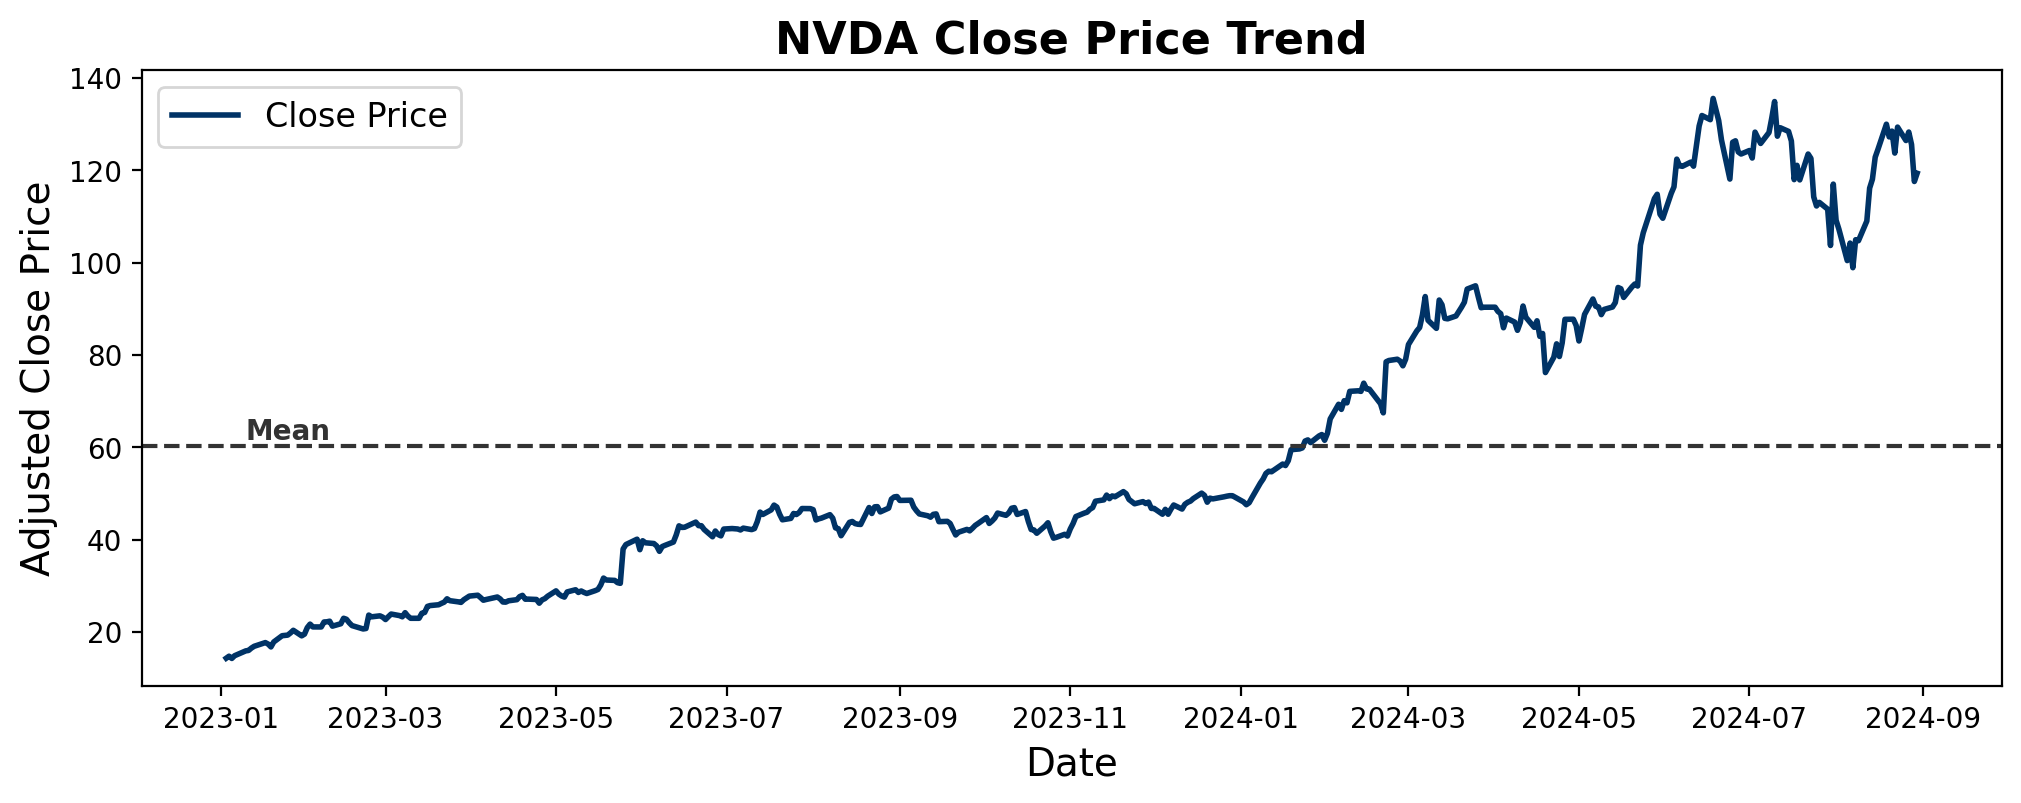

In [242]:
# Download stock data

stock_symbol = 'NVDA'
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 8, 31)
raw_data = yf.download(stock_symbol, start_date, end_date)

## data processing
data = raw_data.copy().stack().reset_index()
data['Close'] = data['Adj Close']  # Use 'Adj Close' for adjusted prices

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(data.set_index('Date')['Close'], label='Close Price', color='#003366', linewidth=2)
# 
# percentiles = [15, 50, 85]
# for perc in percentiles:
#     line_value = np.percentile(data['Close'], perc)
#     plt.axhline(line_value, color='#333333', linestyle='--', linewidth=1.5)
#     plt.text(data['Date'].iloc[5], line_value, f'{perc} Percentile', color='#333333', 
#              fontsize=10, ha='left', va='bottom', fontweight='bold')

line_value = data['Close'].mean()
plt.axhline(line_value, color='#333333', linestyle='--', linewidth=1.5)
plt.text(data['Date'].iloc[5], line_value, 'Mean', color='#333333', 
         fontsize=10, ha='left', va='bottom', fontweight='bold')

plt.title(f"{stock_symbol} Close Price Trend", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Adjusted Close Price", fontsize=14)

plt.legend(fontsize=12,loc='upper left')
plt.show()

## Technical Analysis:
To enhance your understanding of the stock data, apply the following technical analysis indicators:  
### Trend Identification:  
- Use Simple Moving Averages (SMA) and Exponential Moving Averages (EMA) to identify price trends.
### Overbought/Oversold Detection:
- Use the Relative Strength Index (RSI) to identify overbought or oversold conditions.
### Buying/Selling Pressure:
- Analyze On-Balance Volume (OBV) to assess the pressure of buying or selling activity.

### Trend Identification:
- #### Definition:
    - ùëÖùëéùëõùëîùëí = ùëÄùëñùëëùëùùëüùëñùëêùëí ¬± ùëÜùëùùëüùëíùëéùëë
    - Midprice:
    - Spread:
- #### Restriction:
    - **Stable Market Conditions:**
    The strategy performs best in range-bound or sideways markets where prices oscillate around a relatively stable mean. It's less effective in strongly trending markets.
    - **Consistent Volatility:**
    The strategy relies on measuring deviations from the mean. It works well when volatility is consistent enough to create reliable upper and lower bands.
    - **Mean Stability:**
    As you noted, the mean should be relatively steady. Rapid shifts in the average price can lead to false signals.
    - **Absence of Major Trends:**
    The strategy assumes prices will revert to the mean. In strongly trending markets, this assumption may not hold, reducing accuracy.
- #### Improvement:
    - auto calculate window based on vlotility

In [146]:
df = data.copy()

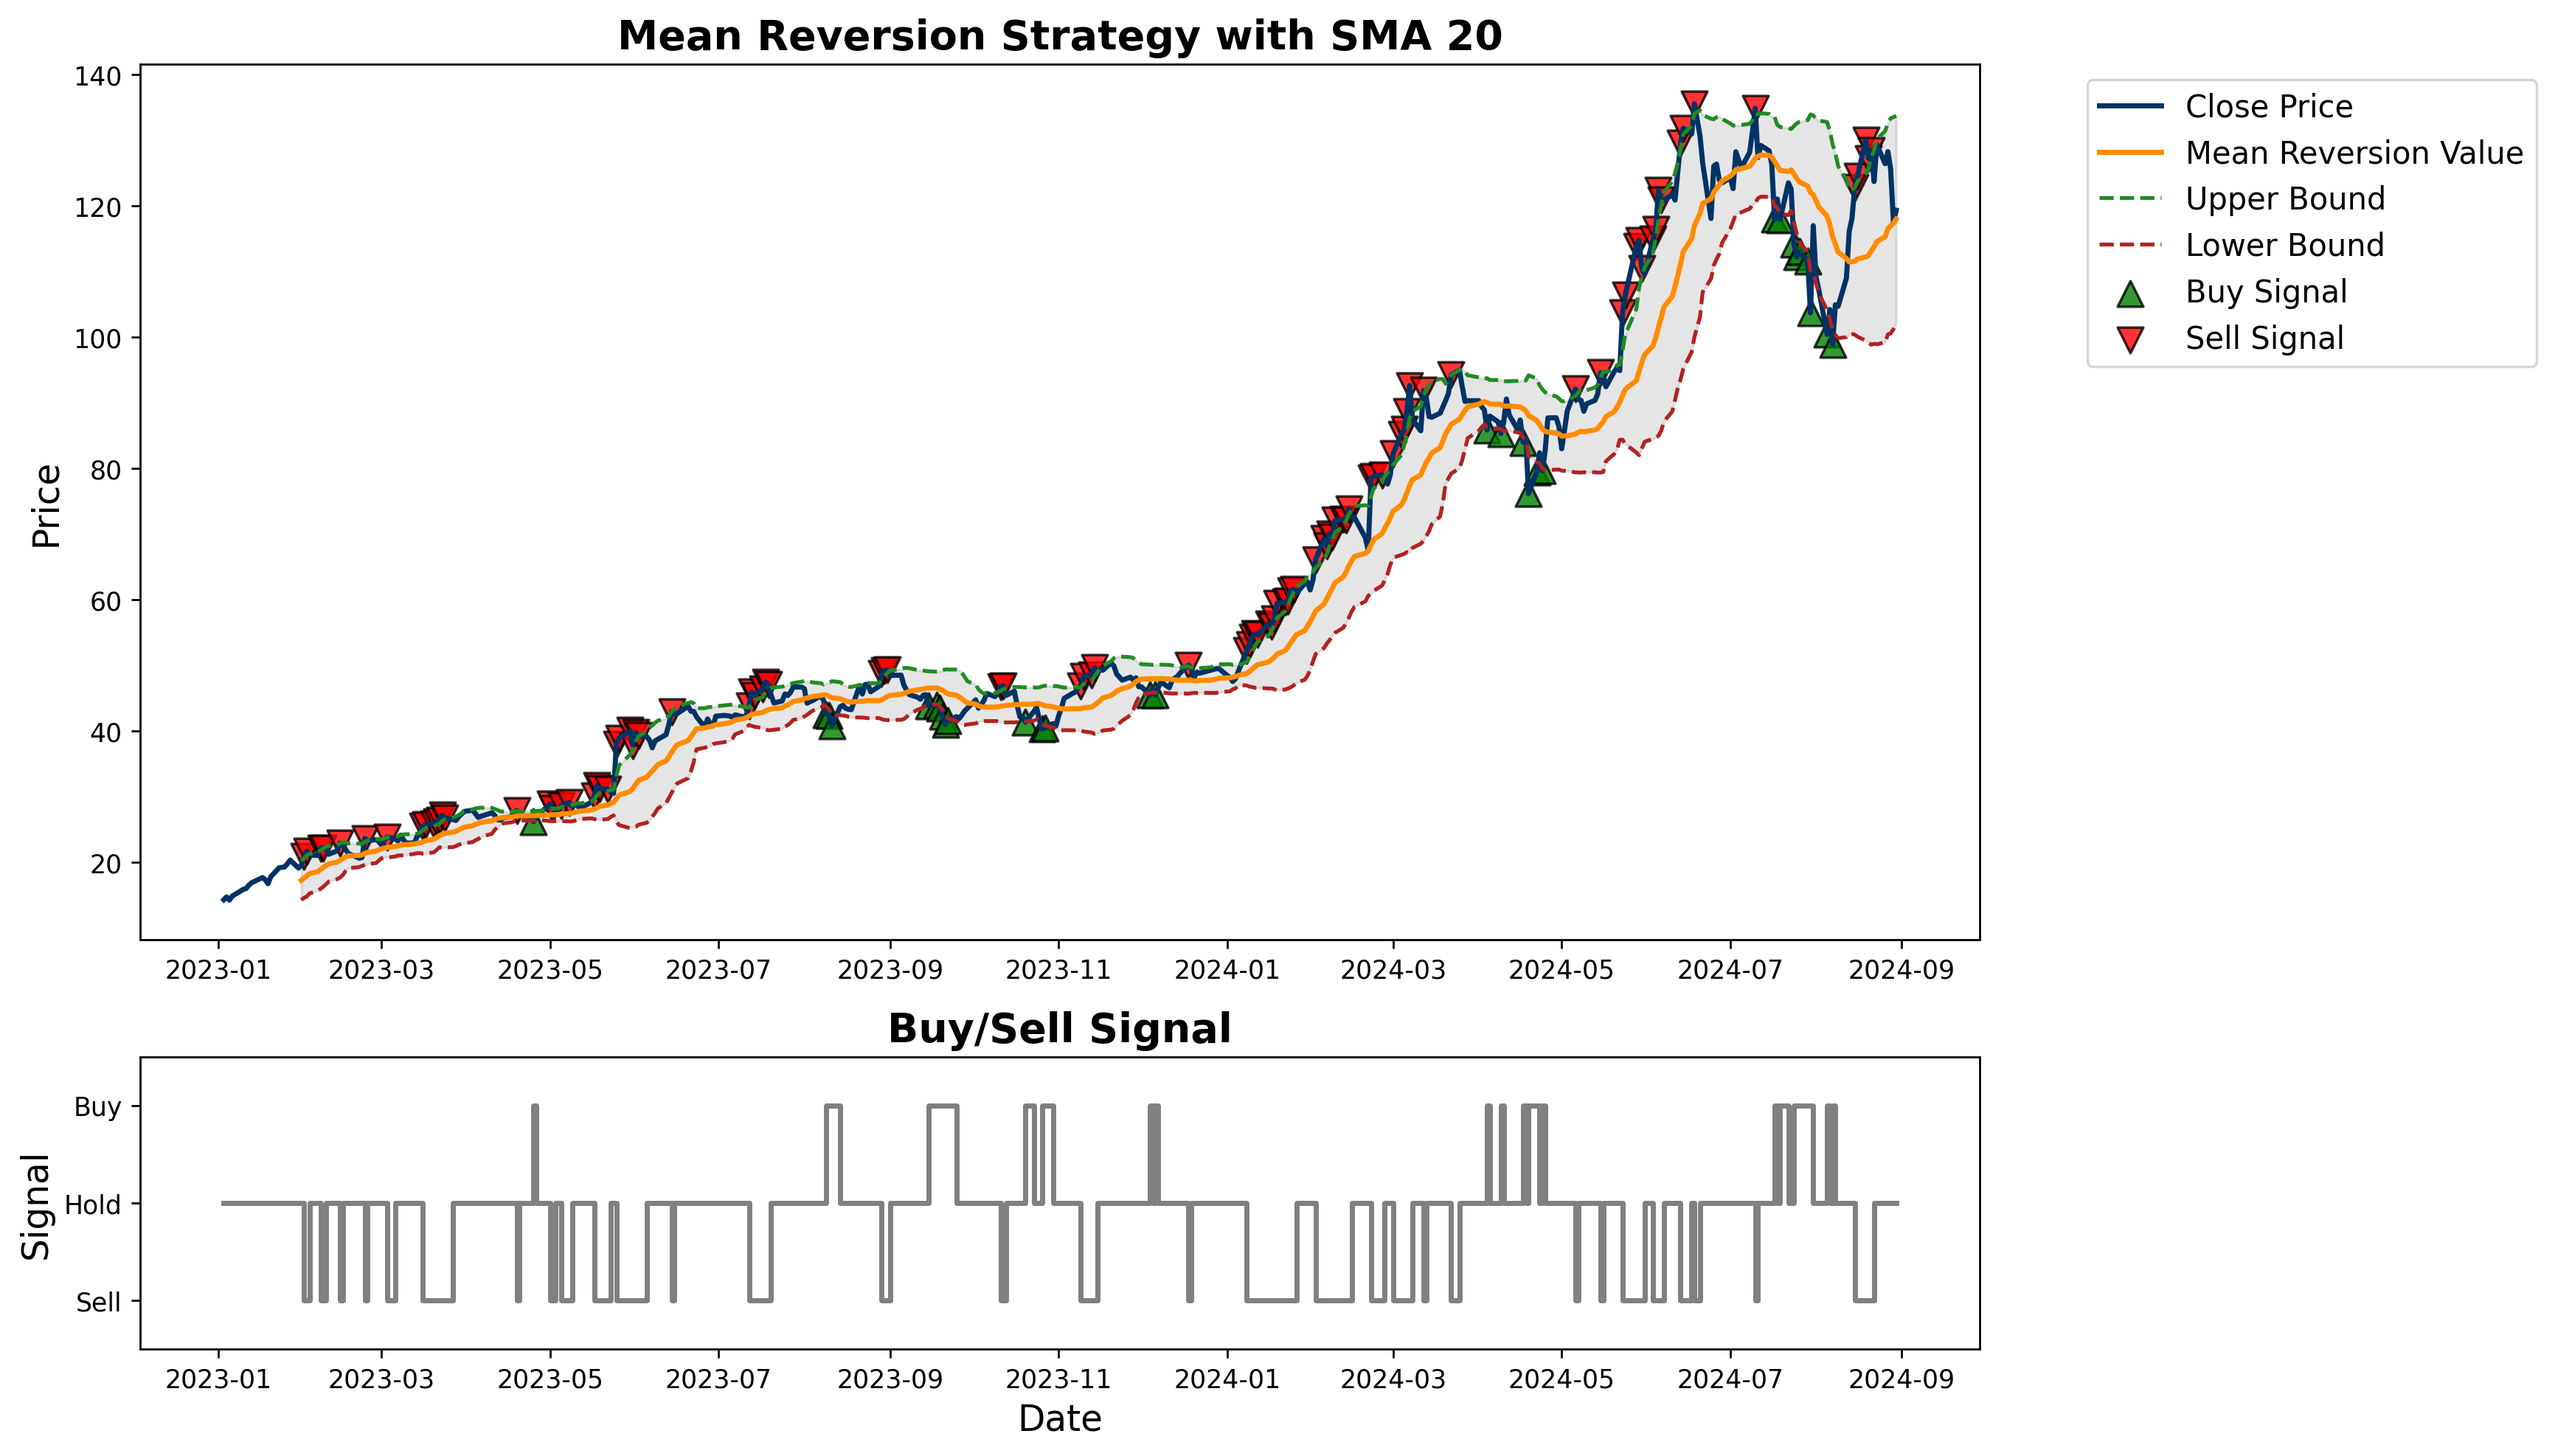

In [261]:
def mean_reversion_strategy(data, midprice_type, window, volatility_ratio):
    data = data.copy()
    
    # Calculate midprice (SMA or EMA)
    if midprice_type == "SMA":
        data['mr'] = data['Close'].rolling(window=window).mean()
    elif midprice_type == "EMA":
        data['mr'] = data['Close'].ewm(span=window, adjust=False).mean()
    
    # Calculate standard deviation (volatility)
    volatility = data['Close'].rolling(window=window).std()
    
    
    # Add calculated columns for visualization
    data['Upper Bound'] = data['mr'] + volatility_ratio * volatility
    data['Lower Bound'] = data['mr'] - volatility_ratio * volatility

    # Define buy/sell signals based on Z-score thresholds
    data['Signal'] = np.where(data['Close'] < data['Lower Bound'], 'Buy', 
                              np.where(data['Close'] > data['Upper Bound'], 'Sell', 'Hold'))

    return data

# Visualize and analyze results
def Original_visualize_signal(data_sma_zscore, midprice_col):
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 8), dpi=250, gridspec_kw={'height_ratios': [3, 1]})


    ax1 = axs[0]
    ax1.plot(data_sma_zscore.set_index('Date')['Close'], label='Close Price', color='#003366', linewidth=2)
    ax1.plot(data_sma_zscore.set_index('Date')[midprice_col], label='Mean Reversion Value', color='#FF8C00', linewidth=2)
    ax1.plot(data_sma_zscore.set_index('Date')['Upper Bound'], label='Upper Bound', color='#228B22', linestyle='--', linewidth=1.5)
    ax1.plot(data_sma_zscore.set_index('Date')['Lower Bound'], label='Lower Bound', color='#B22222', linestyle='--', linewidth=1.5)

    ax1.fill_between(data_sma_zscore.set_index('Date').index, 
                     data_sma_zscore['Lower Bound'], 
                     data_sma_zscore['Upper Bound'], 
                     color='gray', alpha=0.2)

    buy_signals = data_sma_zscore[data_sma_zscore['Signal'] == 'Buy']
    sell_signals = data_sma_zscore[data_sma_zscore['Signal'] == 'Sell']
    ax1.scatter(buy_signals.set_index('Date').index, 
                buy_signals['Close'], 
                marker='^', 
                color='green', 
                label='Buy Signal', 
                s=100, 
                alpha=0.8, 
                edgecolor='black')
    ax1.scatter(sell_signals.set_index('Date').index, 
                sell_signals['Close'], 
                marker='v', 
                color='red', 
                label='Sell Signal', 
                s=100, 
                alpha=0.8, 
                edgecolor='black')

    ax1.set_title("Mean Reversion Strategy with SMA 20", fontsize=16, fontweight='bold')
    ax1.set_ylabel("Price", fontsize=14)
    ax1.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1.05, 1))


    ax2 = axs[1]
    ax2.step(data_sma_zscore.set_index('Date').index, 
             data_sma_zscore['Signal'].replace({'Buy': 1, 'Sell': -1, 'Hold': 0}),
             where='post', 
             color='gray', linewidth=2)
    ax2.set_ylim(-1.5, 1.5)  # ËÆæÁΩÆyËΩ¥ËåÉÂõ¥
    ax2.set_yticks([-1, 0, 1])
    ax2.set_yticklabels(['Sell', 'Hold', 'Buy'])
    ax2.set_title("Buy/Sell Signal", fontsize=16, fontweight='bold')
    ax2.set_xlabel("Date", fontsize=14)
    ax2.set_ylabel("Signal", fontsize=14)

    plt.tight_layout()
    plt.show()


  
# Mean reversion strategy
data_sma_zscore = mean_reversion_strategy(data, "SMA", 20, 1.5)


# Visualize long / short results
Original_visualize_signal(data_sma_zscore, 'mr')

### Optimized algorithm

In [255]:
# 
def ma_crossover_strategy(data, z_threshold=1.5):
    data = data.copy()

    # SMA20 & SMA50
    data['SMA20'] = data['Close'].rolling(window=20).mean()
    data['SMA50'] = data['Close'].rolling(window=50).mean()

    # Calculate Z-score
    volatility = data['Close'].rolling(window=20).std()
    data['Z-score'] = (data['Close'] - data['SMA20']) / volatility
    
    # MA crossover 
    data['Signal'] = np.where(
        (data['SMA20'] > data['SMA50']) & (data['Z-score'] < -z_threshold), 'Buy',  # up + Z-score
        np.where((data['SMA20'] < data['SMA50']) & (data['Z-score'] > z_threshold), 'Sell',  # down - Z-score
                            'Hold'))

    # Upper & Lowerbound
    data['Upper Bound'] = data['SMA20'] + z_threshold * volatility
    data['Lower Bound'] = data['SMA20'] - z_threshold * volatility

    return data

data_strategy = ma_crossover_strategy(data, z_threshold=1.5)

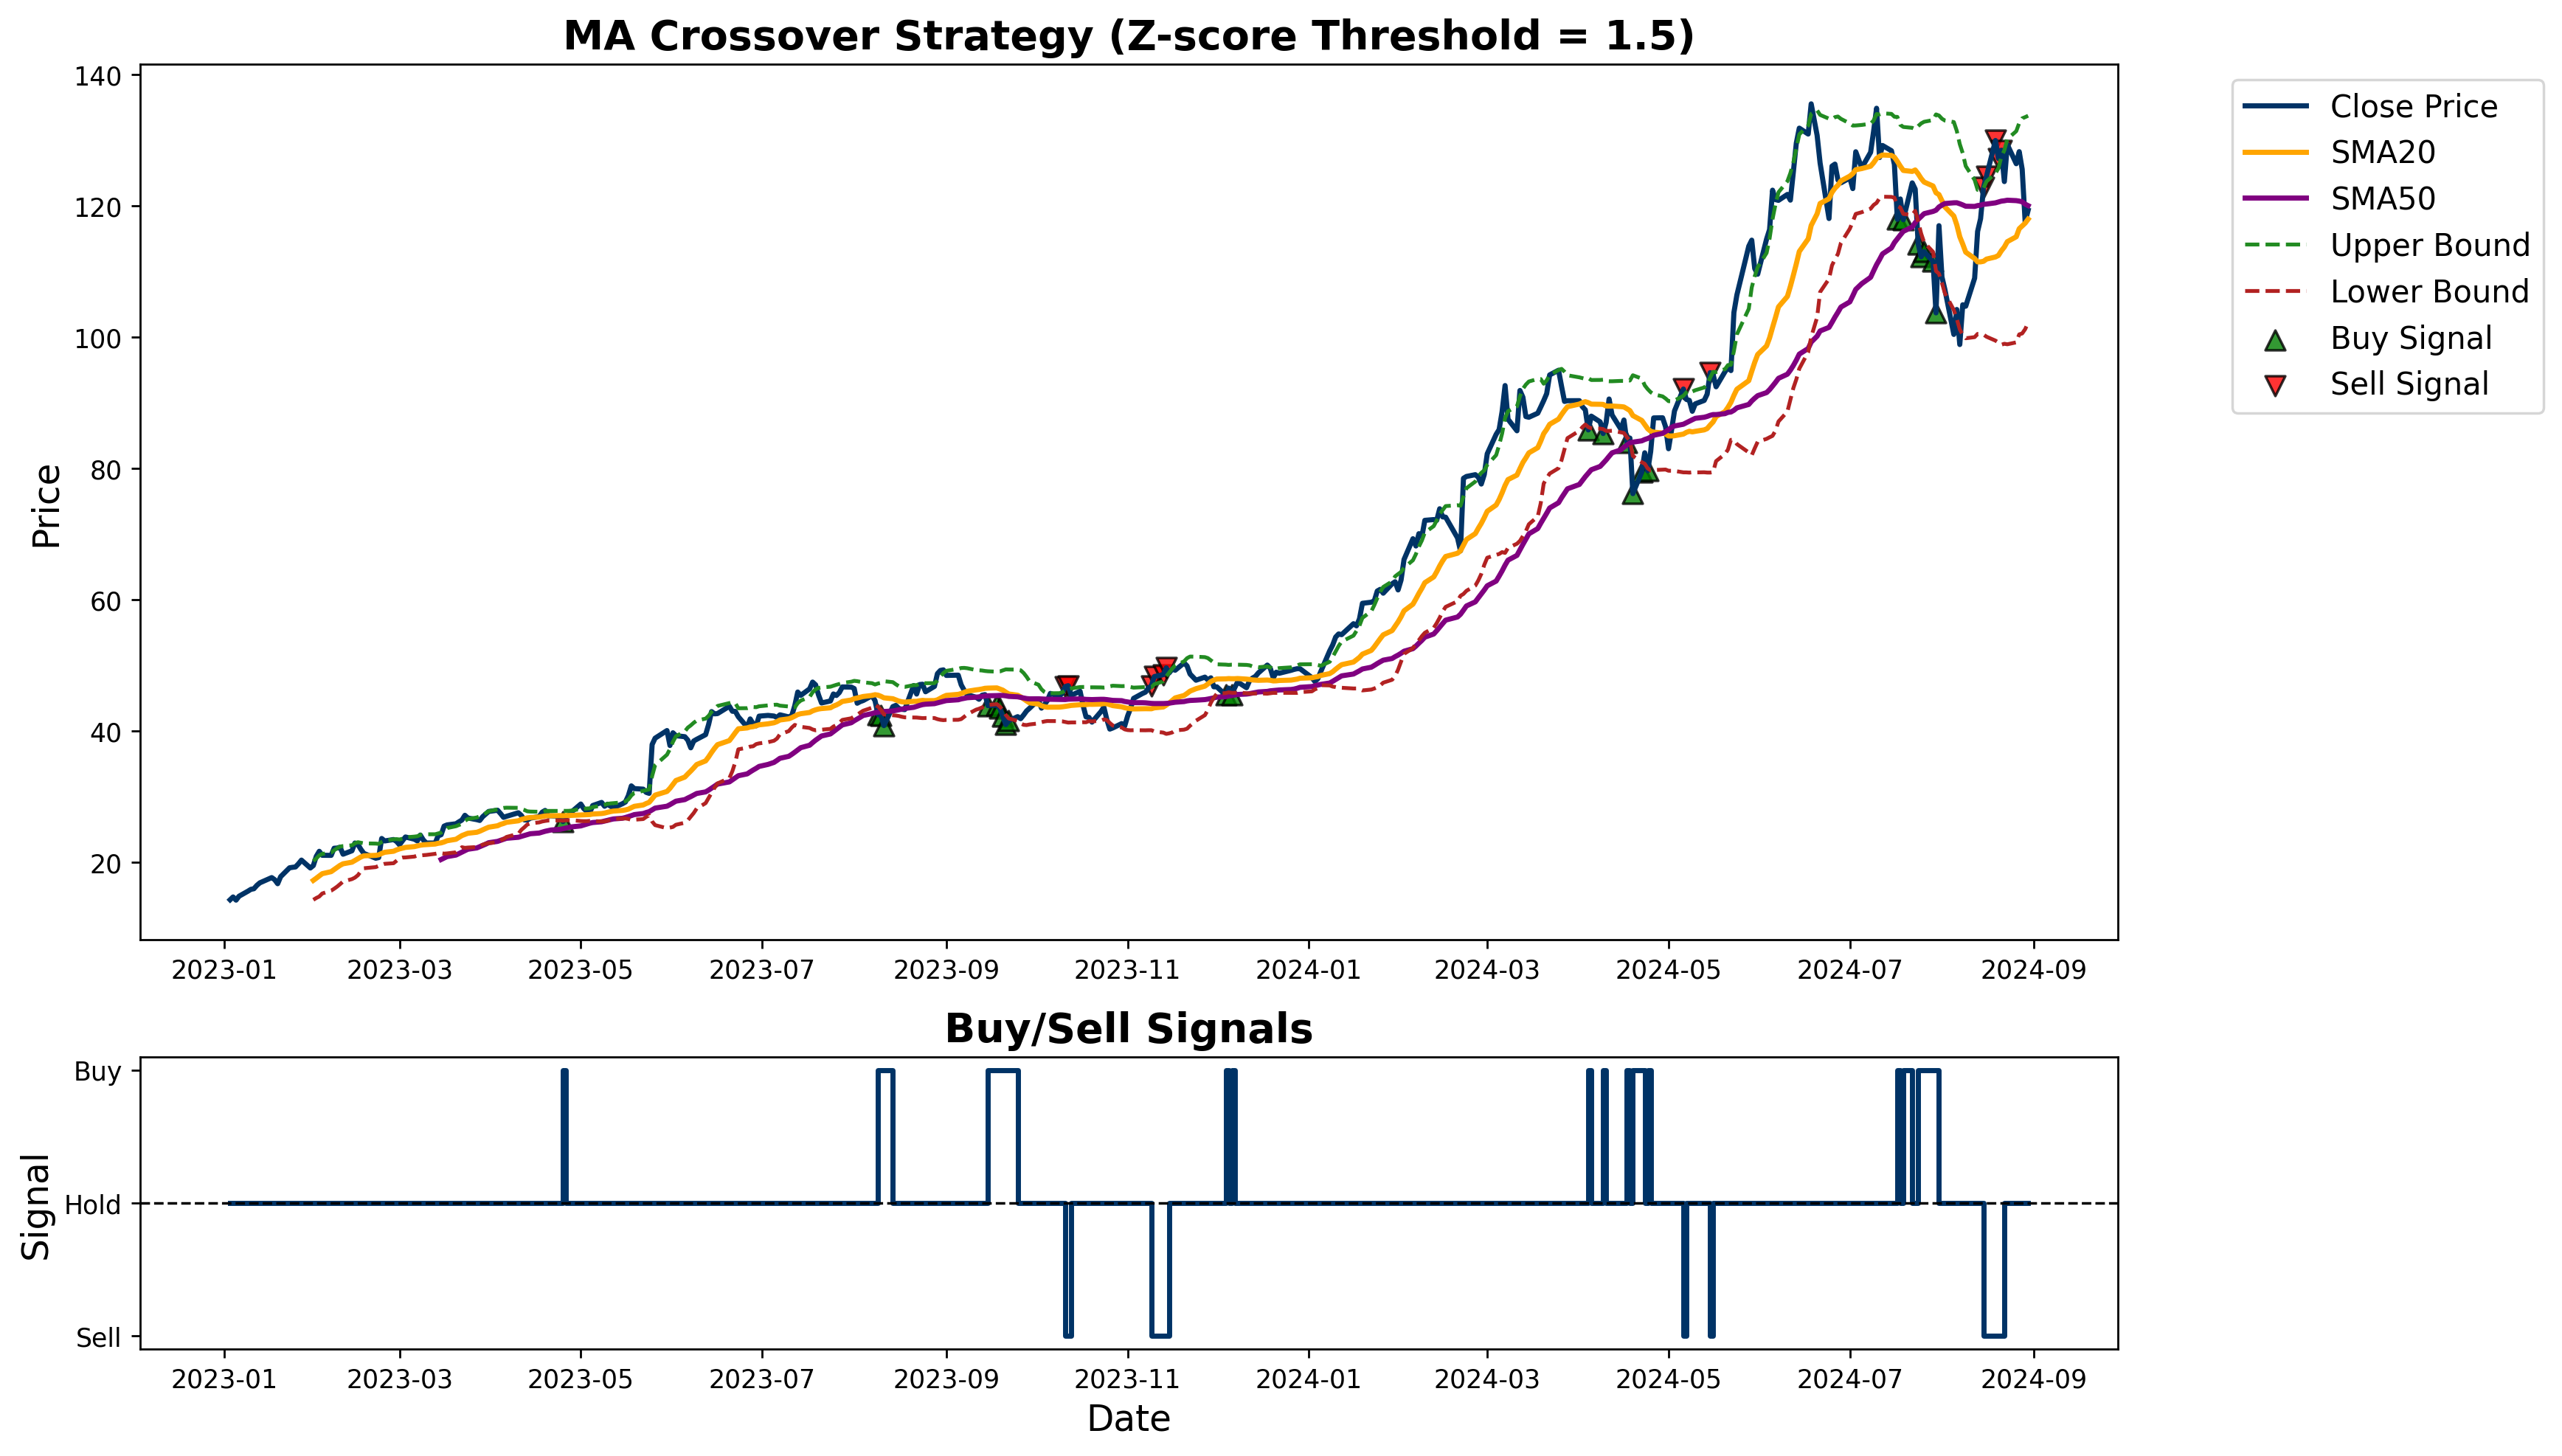

In [254]:

# ÂèØËßÜÂåñ‰ºòÂåñÂêéÁöÑÂ§öÂ§¥/Á©∫Â§¥ÁªìÊûú
def Optimized_visualize_with_subplot(data_strategy):
    # ËÆæÁΩÆÂ≠êÂõæÁöÑÈ´òÂ∫¶ÊØî‰æã
    fig, ax = plt.subplots(2, 1, figsize=(14, 8), dpi=250, gridspec_kw={'height_ratios': [3, 1]})

    # ‰∏äÈù¢Â≠êÂõæÔºöÂùáÂÄºÂõûÂΩíÂõæË°®
    ax[0].plot(data_strategy.set_index('Date')['Close'], label='Close Price', color='#003366', linewidth=2)
    ax[0].plot(data_strategy.set_index('Date')['SMA20'], label='SMA20', color='#FFA500', linewidth=2)
    ax[0].plot(data_strategy.set_index('Date')['SMA50'], label='SMA50', color='#800080', linewidth=2)
    ax[0].plot(data_strategy.set_index('Date')['Upper Bound'], label='Upper Bound', color='#228B22', linestyle='--', linewidth=1.5)
    ax[0].plot(data_strategy.set_index('Date')['Lower Bound'], label='Lower Bound', color='#B22222', linestyle='--', linewidth=1.5)
    
    buy_signals = data_strategy[data_strategy['Signal'] == 'Buy']
    sell_signals = data_strategy[data_strategy['Signal'] == 'Sell']
    ax[0].scatter(buy_signals.set_index('Date').index, buy_signals['Close'], marker='^', color='green', label='Buy Signal', s=60, alpha=0.8, edgecolor='black')
    ax[0].scatter(sell_signals.set_index('Date').index, sell_signals['Close'], marker='v', color='red', label='Sell Signal', s=60, alpha=0.8, edgecolor='black')
    
    ax[0].set_title("MA Crossover Strategy (Z-score Threshold = 1.5)", fontsize=16, fontweight='bold')
    ax[0].set_ylabel("Price", fontsize=14)
    ax[0].legend(fontsize=12, loc='upper left', bbox_to_anchor=(1.05, 1))

    # ‰∏ãÈù¢Â≠êÂõæÔºö‰π∞ÂÖ•ÂçñÂá∫ÊñπÂΩ¢Ê≥¢Âõæ
    ax[1].step(data_strategy['Date'], data_strategy['Signal'].apply(lambda x: 1 if x == 'Buy' else (-1 if x == 'Sell' else 0)), where='post', color='#003366', linewidth=2)
    ax[1].set_title("Buy/Sell Signals", fontsize=16, fontweight='bold')
    ax[1].set_xlabel("Date", fontsize=14)
    ax[1].set_ylabel("Signal", fontsize=14)
    ax[1].axhline(0, color='black', linestyle='--', linewidth=1)
    ax[1].set_yticks([-1, 0, 1])
    ax[1].set_yticklabels(['Sell', 'Hold', 'Buy'])

    plt.tight_layout()
    plt.show()

# ‰ΩøÁî®‰ºòÂåñÂêéÁöÑÂèØËßÜÂåñÂáΩÊï∞
Optimized_visualize_with_subplot(data_strategy)


### Overbought/Oversold Detection:
- Definition:
- Restriction:
- Improvement:
Overbought/Oversold Detection:
Use the Relative Strength Index (RSI) to identify overbought or oversold conditions.
The 80 level usually becomes the overbought level in bull markets and 20 level the oversold
level in bear markets.
‚Ä¢ 14 days are usually used in the calculation.
‚Ä¢ The 50 level is the RSI midpoint value, and will often act as support during pullbacks and
resistance during bounces. Some traders treat RSI crossings above and below the 50 level as
buying and selling signals respectively.

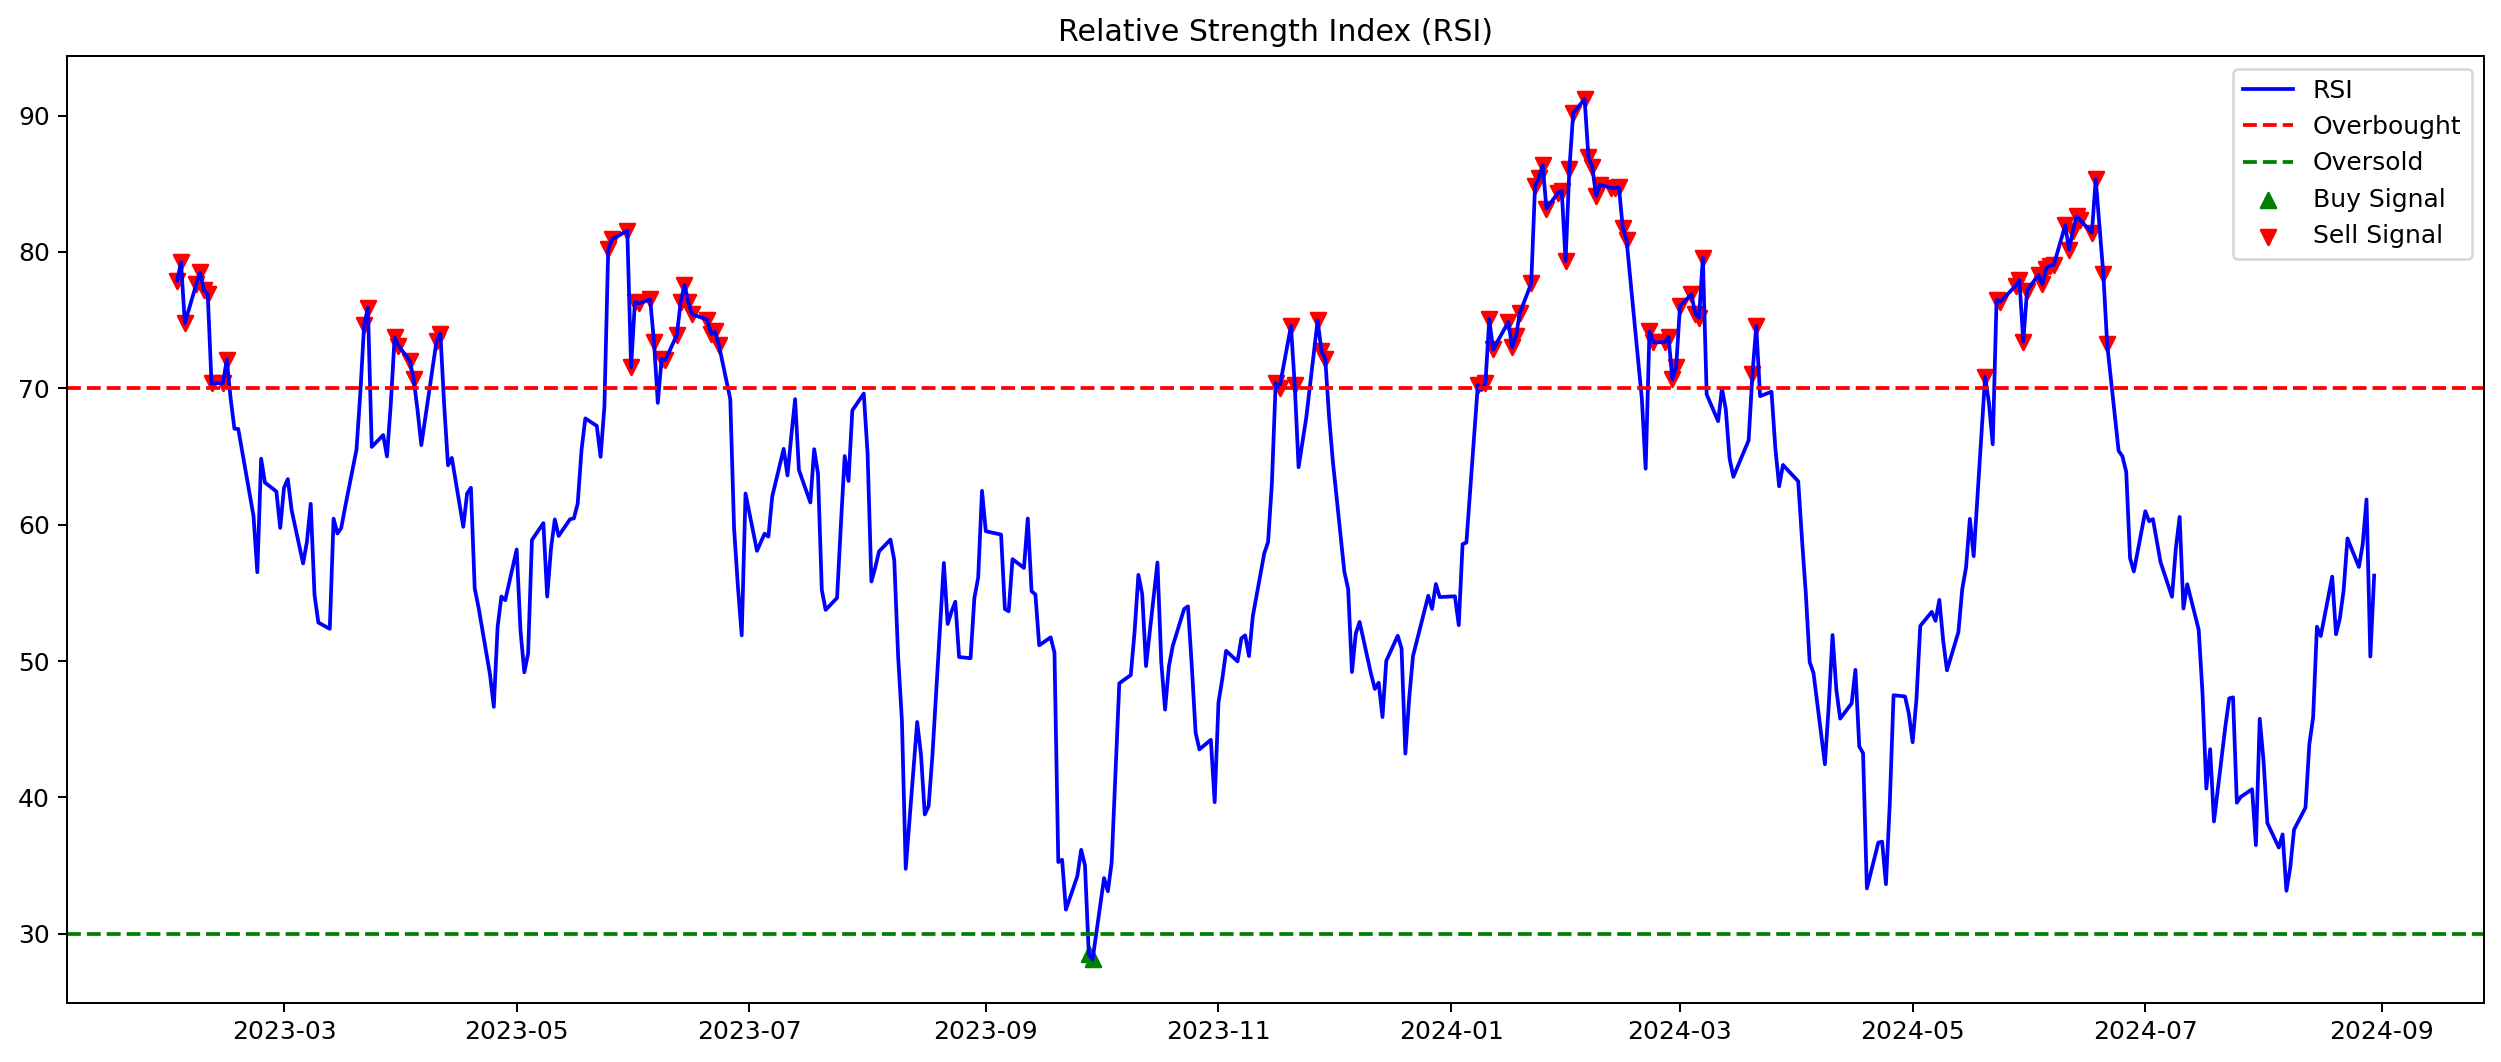

In [221]:
def calculate_rs(data, window):
    """  ùëÖùëÜ = ùê¥ùë£ùëíùëüùëéùëîùëí ùëúùëì ùë• ùëëùëéùë¶ùë†‚Ä≤ùë¢ùëù ùëêùëôùëúùë†ùëíùë†/ùê¥ùë£ùëíùëüùëéùëîùëí ùëúùëì ùë• ùëëùëéùë¶ùë†‚Ä≤ ùëëùëúùë§ùëõ ùëêùëôùëúùë†ùëíùë† """
    data = data.copy()
    
    # Calculate up closes & down closes
    up_closes = data['Close'].diff().apply(lambda x: x if x > 0 else 0)
    down_closes = data['Close'].diff().apply(lambda x: abs(x) if x < 0 else 0)
    
    # Calculate the moving average 
    avg_up_closes = up_closes.rolling(window=window).mean()
    avg_up_down = down_closes.rolling(window=window).mean()
    
    return avg_up_closes/avg_up_down


def calculate_rsi(data, window, oversold_level, overbought_level):
    """ ùëÖùëÜùêº = 100 ‚àí 100/(1 + ùëÖùëÜ) """
    data = data.copy()
    
    rs = calculate_rs(data, window)

    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))
    
    # Add RSI to the DataFrame
    data['RSI'] = rsi
    
    # Identify buy/sell signals
    data['RSI_Signal'] = np.where(data['RSI'] < oversold_level, 'Oversold Level',
                                  np.where(data['RSI'] > overbought_level, 'Overbought Level', 
                                  np.where(data['RSI'] < 50, 'Buying Signal','Selling Signal')))
    
    return data

data_rsi = calculate_rsi(data, window=21, oversold_level=30, overbought_level=70)

# Show buy and sell signals
buy_signals = data_rsi[data_rsi['RSI_Signal'] == 'Oversold Level']
sell_signals = data_rsi[data_rsi['RSI_Signal'] == 'Overbought Level']

# RSI Plot
plt.figure(figsize=(14, 6), dpi=180) 
plt.plot(data_rsi.set_index('Date')['RSI'], label='RSI', color='blue')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.scatter(buy_signals.set_index('Date').index, buy_signals['RSI'], marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(sell_signals.set_index('Date').index, sell_signals['RSI'], marker='v', color='red', label='Sell Signal', alpha=1)

plt.title("Relative Strength Index (RSI)")
plt.legend()

plt.tight_layout()
plt.show()

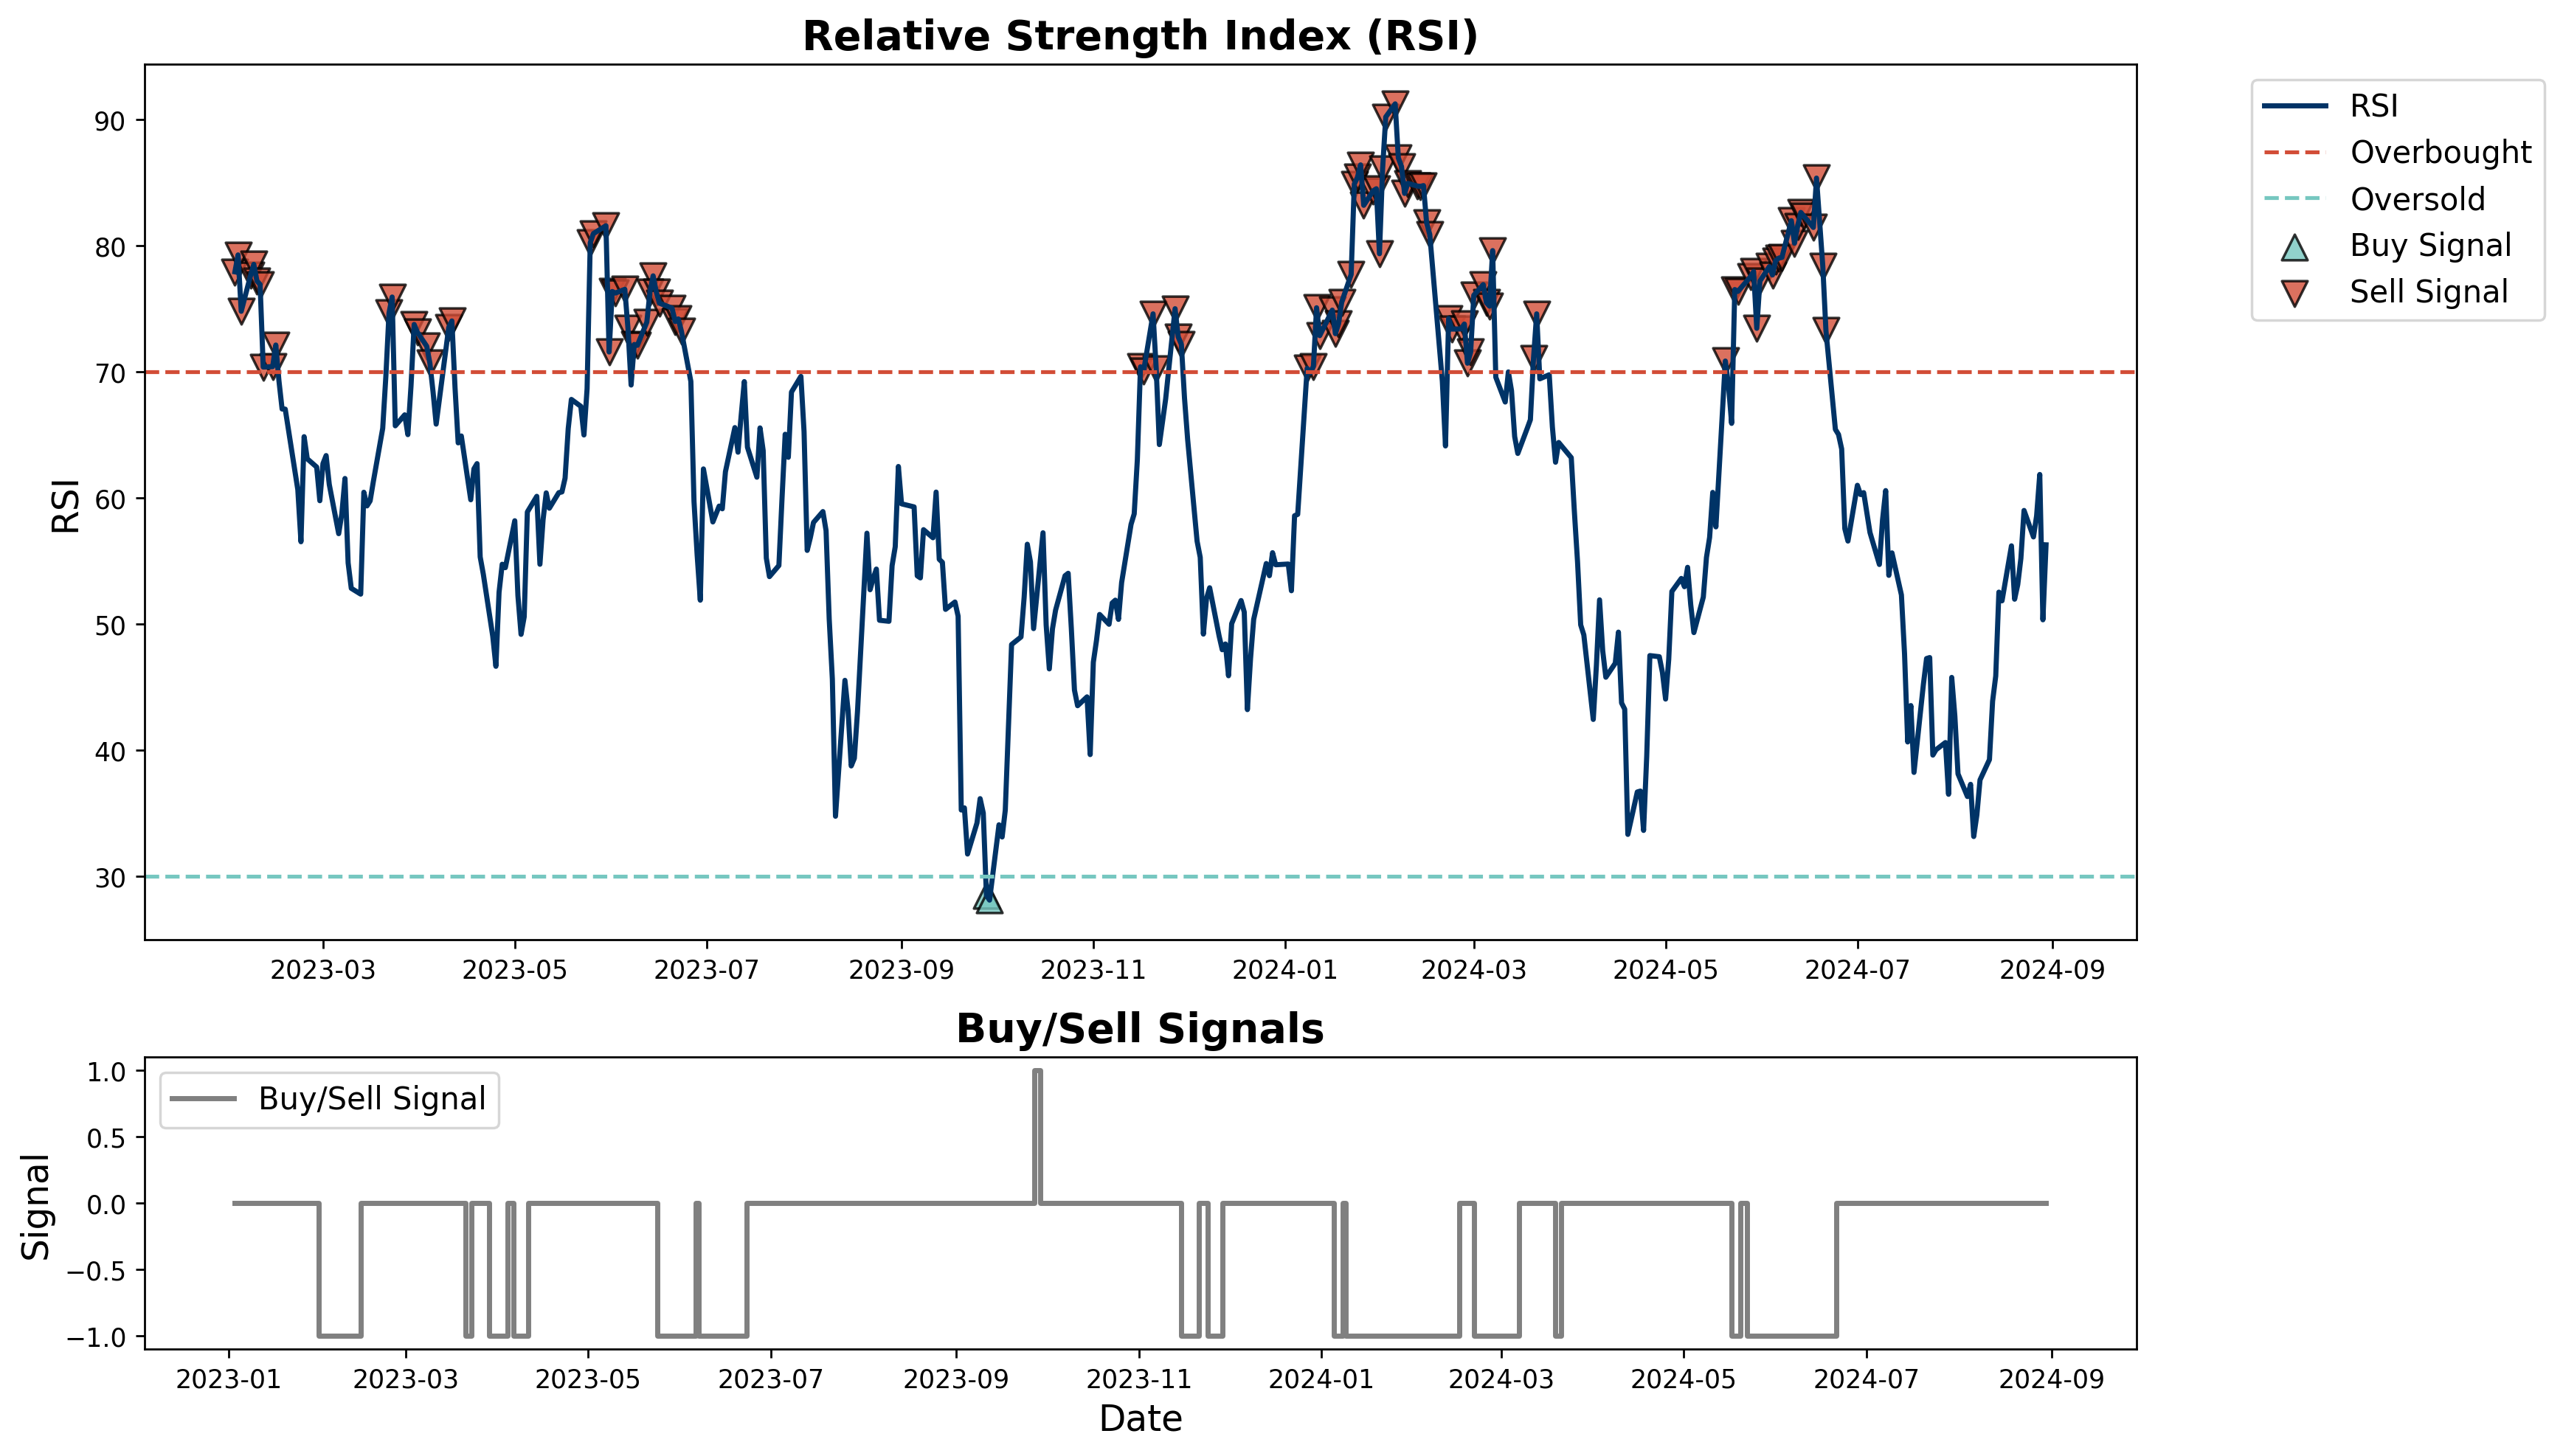

In [277]:
import matplotlib.pyplot as plt

def visualize_rsi_and_signals(data_rsi, buy_signals, sell_signals):
    fig, axs = plt.subplots(2, 1, figsize=(14, 8), dpi=250, gridspec_kw={'height_ratios': [3, 1]})
    

    # ‰∏äÂõæÔºöRSIÂõæ
    axs[0].plot(data_rsi.set_index('Date')['RSI'], label='RSI', color='#003366', linewidth=2)
    axs[0].axhline(70, color='#D24D37', linestyle='--', label='Overbought', linewidth=1.5)
    axs[0].axhline(30, color='#76C7C0', linestyle='--', label='Oversold', linewidth=1.5)

    axs[0].scatter(buy_signals.set_index('Date').index, buy_signals['RSI'], 
                   marker='^', color='#76C7C0', label='Buy Signal', s=100, alpha=0.8, edgecolor='black')
    axs[0].scatter(sell_signals.set_index('Date').index, sell_signals['RSI'], 
                   marker='v', color='#D24D37', label='Sell Signal', s=100, alpha=0.8, edgecolor='black')

    axs[0].set_title("Relative Strength Index (RSI)", fontsize=16, fontweight='bold')
    axs[0].set_ylabel("RSI", fontsize=14)
    axs[0].legend(fontsize=12, loc='upper left', bbox_to_anchor=(1.05, 1))

    # ‰∏ãÂõæÔºö‰π∞ÂÖ•ÂçñÂá∫‰ø°Âè∑ÁöÑÊñπÂΩ¢Ê≥¢Âõæ
    signals = pd.Series(0, index=data_rsi['Date'], dtype=int)
    signals[buy_signals.set_index('Date').index] = 1  # ‰π∞ÂÖ•‰ø°Âè∑
    signals[sell_signals.set_index('Date').index] = -1  # ÂçñÂá∫‰ø°Âè∑

    axs[1].step(data_rsi['Date'], signals, label='Buy/Sell Signal', color='gray', linewidth=2)
    
    axs[1].set_title("Buy/Sell Signals", fontsize=16, fontweight='bold')
    axs[1].set_xlabel("Date", fontsize=14)
    axs[1].set_ylabel("Signal", fontsize=14)

    axs[1].legend(fontsize=12, loc='upper left')

    plt.tight_layout()
    plt.show()

# ‰ΩøÁî®ÂèØËßÜÂåñÂáΩÊï∞
visualize_rsi_and_signals(data_rsi, buy_signals, sell_signals)

### Buying/Selling Pressure:
- Analyze On-Balance Volume (OBV) to assess the pressure of buying or selling activity.

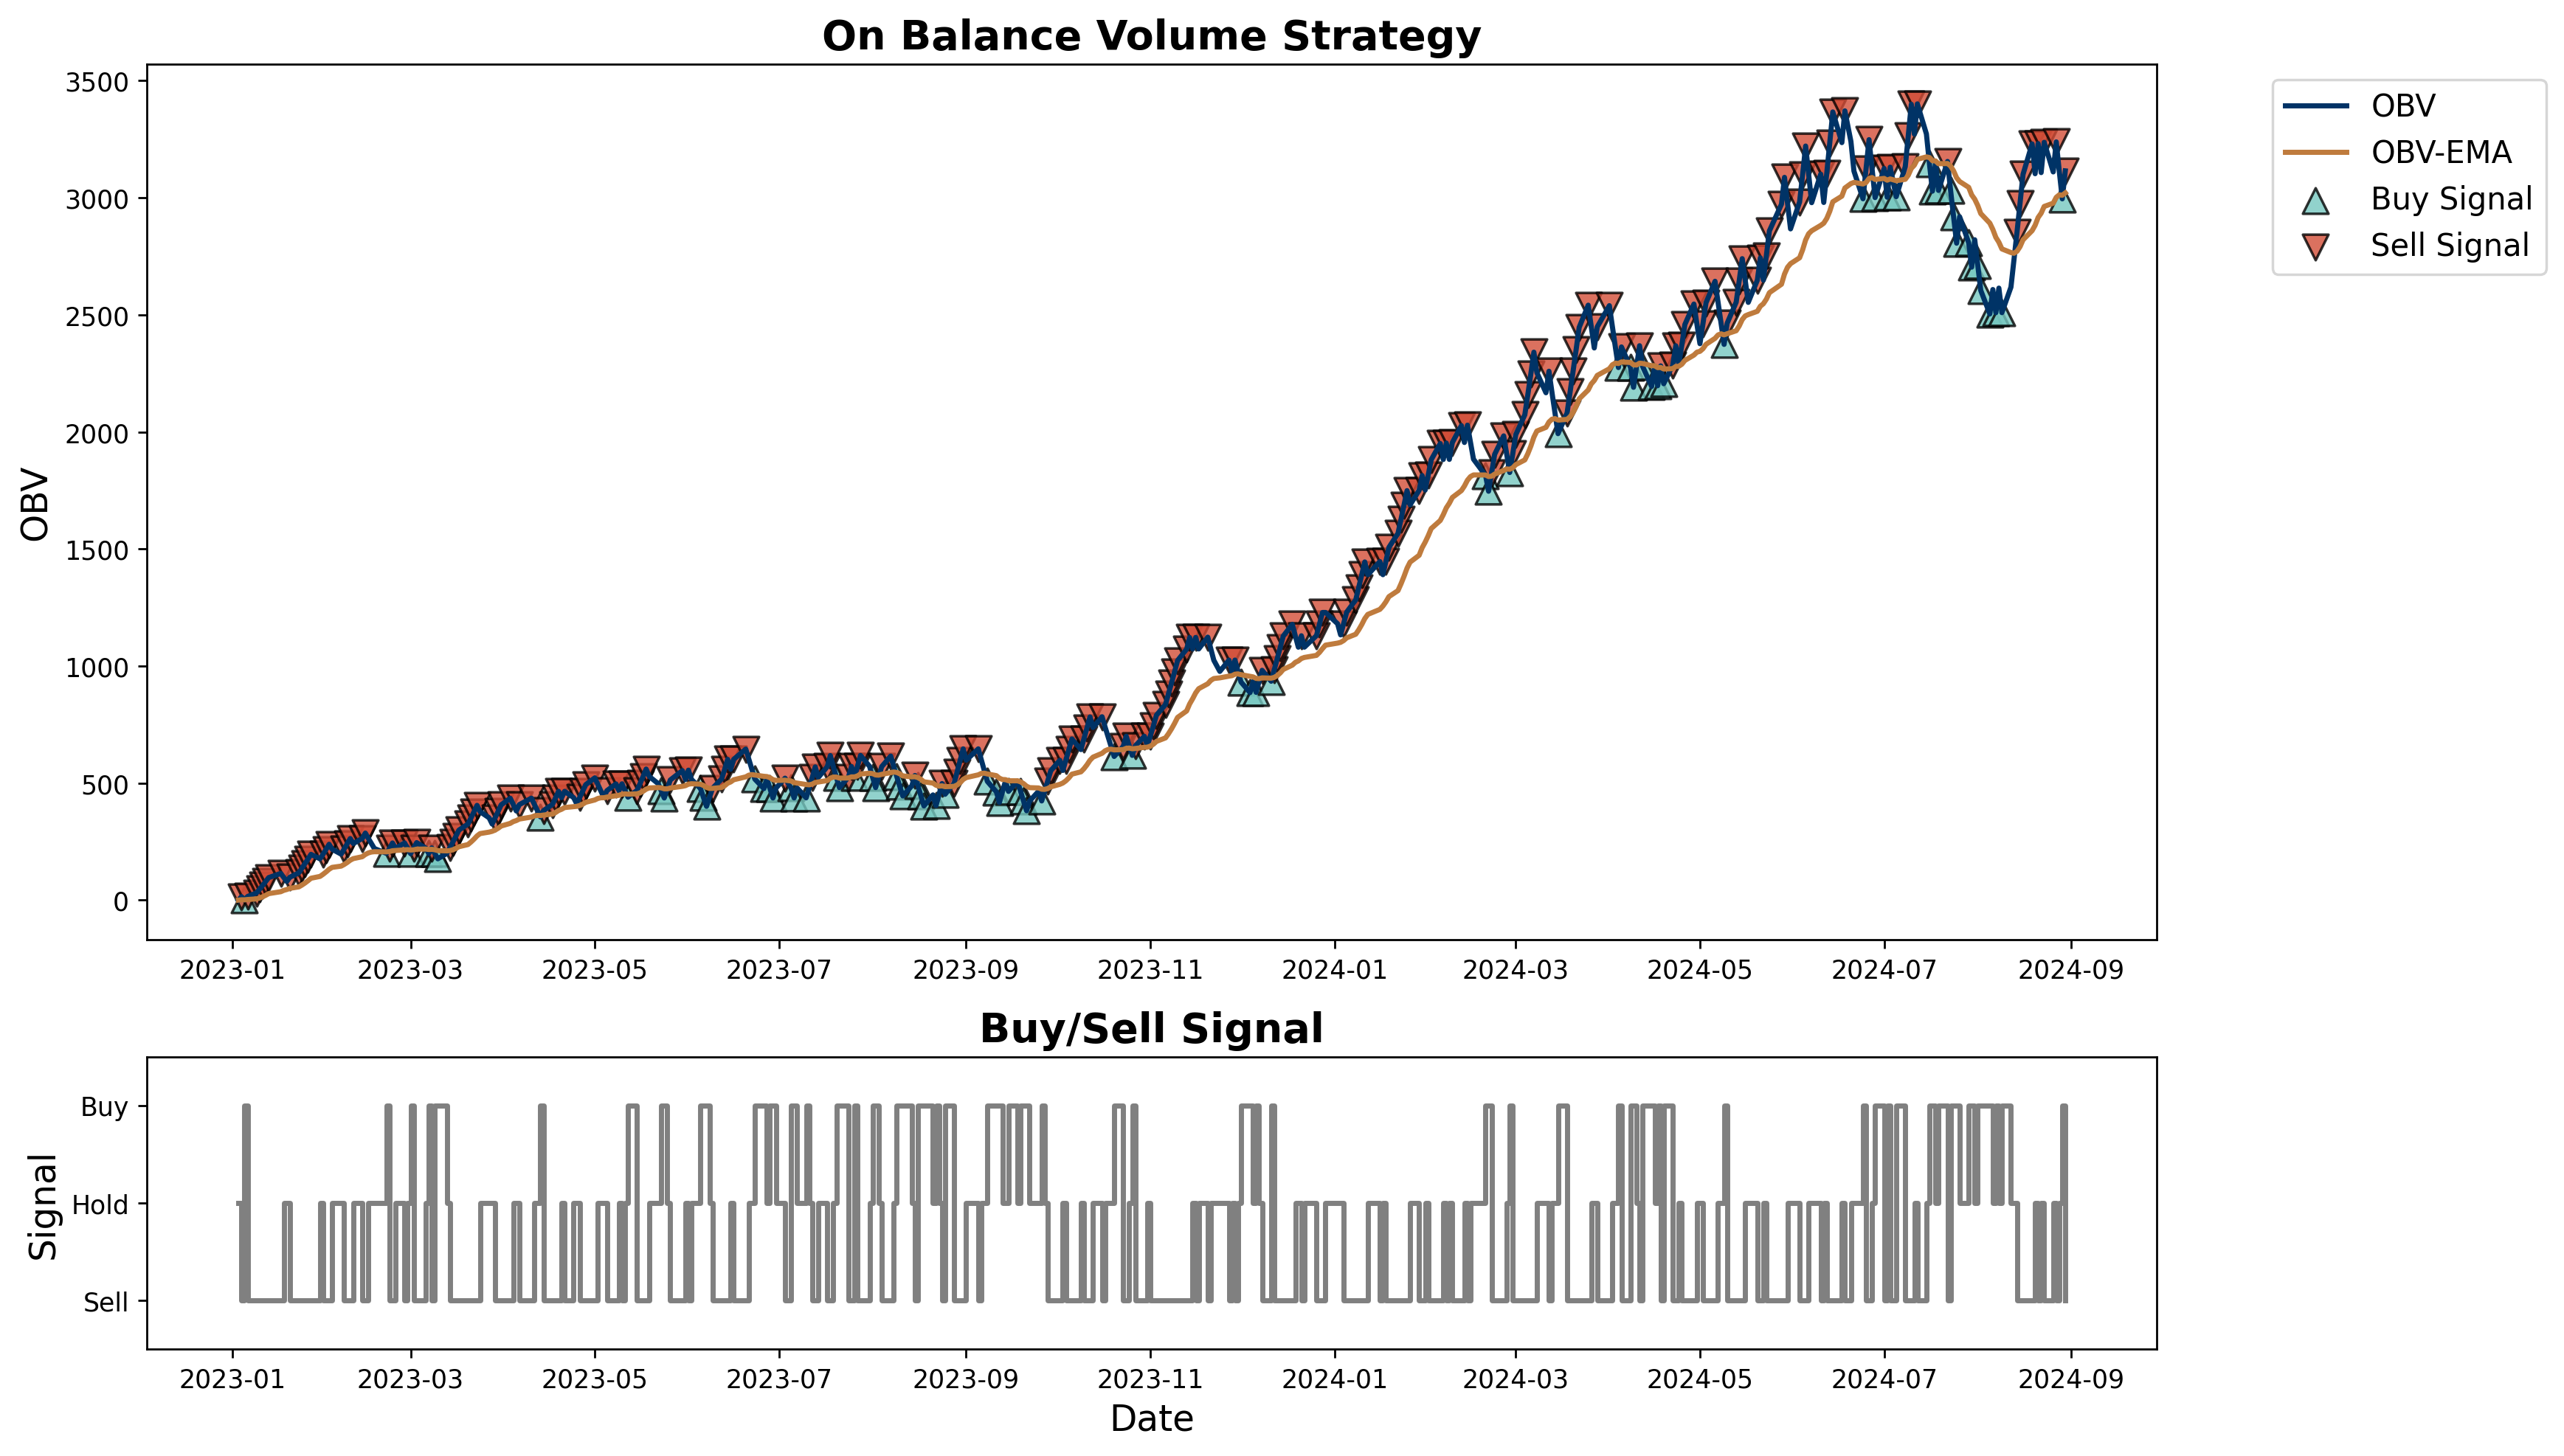

In [263]:
def calculate_obv(data):
    # set OBV with zeros
    obv = [0]  
    
    for i in range(1, data.shape[0]):
        current_close = data.loc[i,'Close']
        previous_close = data.loc[i-1,'Close']        
        current_volume = data.loc[i,'Close']
        # If Current's close is higher than last day -> add today's vol
        if current_close > previous_close:
            obv.append(obv[-1] + current_volume)
        # If Current's close is lower than last day  -> min today's vol
        elif current_close < previous_close:
            obv.append(obv[-1] - current_volume)
        # If Current's close is equal to last day, -> keep 
        else:
            obv.append(obv[-1])
    
    data['OBV'] = obv
    return data['OBV']

# Calculate OBV
def on_balance_volume_strategy(data, window):
    data = data.copy()

    # obv
    data['OBV']= calculate_obv(data)
    data['OBV_EMA'] = data['OBV'].ewm(span=window, adjust=False).mean()
    
    #If OBV > OBV_EMA Then Buy 
    data['OBV Signal'] = np.where(
        (data['OBV'] < data['OBV_EMA'])& (data['Close'].diff() < 0), 'Buy',  
        np.where(
            (data['OBV'] > data['OBV_EMA'])& (data['Close'].diff() > 0), 'Sell', 
            'Hold'  
        )
    )
    return data

# Visualize long / short results of on_balance_volume_strategy
import matplotlib.pyplot as plt

def Visualize_signal_obv(data):
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 8), dpi=250, gridspec_kw={'height_ratios': [3, 1]})

    # ‰∏äÈù¢ÁöÑÂùáÂÄºÂõûÂΩíÂõæ
    ax1 = axs[0]
    ax1.plot(data.set_index('Date')['OBV'], label='OBV', color='#003366', linewidth=2)
    ax1.plot(data.set_index('Date')['OBV_EMA'], label='OBV-EMA', color='#BF7B3D', linewidth=2)

    buy_signals = data[data['OBV Signal'] == 'Buy']
    sell_signals = data[data['OBV Signal'] == 'Sell']

    ax1.scatter(buy_signals.set_index('Date').index, 
                buy_signals['OBV'], 
                marker='^', 
                color='#76C7C0', 
                label='Buy Signal', 
                s=100, 
                alpha=0.8, 
                edgecolor='black')
    ax1.scatter(sell_signals.set_index('Date').index, 
                sell_signals['OBV'], 
                marker='v', 
                color='#D24D37', 
                label='Sell Signal', 
                s=100, 
                alpha=0.8, 
                edgecolor='black')

    ax1.set_title("On Balance Volume Strategy", fontsize=16, fontweight='bold')
    ax1.set_ylabel("OBV", fontsize=14)
    ax1.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1.05, 1))

    # ‰∏ãÈù¢ÁöÑ‰π∞ÂÖ•ÂçñÂá∫‰ø°Âè∑ÁöÑÊñπÂΩ¢Ê≥¢Âõæ
    ax2 = axs[1]
    ax2.step(data.set_index('Date').index, 
             data['OBV Signal'].replace({'Buy': 1, 'Sell': -1, 'Hold': 0}),
             where='post', 
             color='gray', linewidth=2)
    ax2.set_ylim(-1.5, 1.5)  # ËÆæÁΩÆyËΩ¥ËåÉÂõ¥
    ax2.set_yticks([-1, 0, 1])
    ax2.set_yticklabels(['Sell', 'Hold', 'Buy'])
    ax2.set_title("Buy/Sell Signal", fontsize=16, fontweight='bold')
    ax2.set_xlabel("Date", fontsize=14)
    ax2.set_ylabel("Signal", fontsize=14)

    plt.tight_layout()
    plt.show()



df_obv = on_balance_volume_strategy(data, window=20)
Visualize_signal_obv(df_obv)

In [ ]:
def generate_trading_signals(df, lookback_period=14, ma_short=50, ma_long=200, volatility_multiplier=2):
    # ËÆ°ÁÆóÁßªÂä®Âπ≥ÂùáÁ∫ø
    df['MA_short'] = df['Close'].rolling(window=ma_short).mean()
    df['MA_long'] = df['Close'].rolling(window=ma_long).mean()
    
    # ËÆ°ÁÆóÂ∏ÉÊûóÂ∏¶
    df['volatility'] = df['Close'].rolling(window=lookback_period).std()
    df['upper_band'] = df['MA_short'] + volatility_multiplier * df['volatility']
    df['lower_band'] = df['MA_short'] - volatility_multiplier * df['volatility']

    # Á≠ñÁï• 1: Ë∂ãÂäøË∑üÈöèÁ≠ñÁï•ÔºàMA‰∫§ÂèâÔºâ
    df.loc[(df['MA_short'] > df['MA_long']) & (df['MA_short'].shift(1) <= df['MA_long'].shift(1)), 'Signal'] = 1
    df.loc[(df['MA_short'] < df['MA_long']) & (df['MA_short'].shift(1) >= df['MA_long'].shift(1)), 'Signal'] = -1

def generate_trading_signals(df, lookback_period=14, ma_short=50, ma_long=200, volatility_multiplier=2):
    """
    Ê†πÊçÆ‰∏çÂêåÁ≠ñÁï•ÁîüÊàê‰π∞ÂÖ•ÂíåÂçñÂá∫‰ø°Âè∑„ÄÇ
    
    ÂèÇÊï∞:
    - df: ÂåÖÂê´Êó•ÊúüÁ¥¢ÂºïÁöÑDataFrameÔºåÈúÄÂåÖÂê´ 'Close' Âíå 'Volume' Âàó„ÄÇ
    - lookback_period: Âä®ÈáèÂíåRSIÁöÑÂõûÊ∫ØÂë®ÊúüÔºåÈªòËÆ§‰∏∫14„ÄÇ
    - ma_short: Áü≠ÊúüÁßªÂä®Âπ≥ÂùáÁ∫øÁ™óÂè£Â§ßÂ∞è„ÄÇ
    - ma_long: ÈïøÊúüÁßªÂä®Âπ≥ÂùáÁ∫øÁ™óÂè£Â§ßÂ∞è„ÄÇ
    - volatility_multiplier: Áî®‰∫éÂ∏ÉÊûóÂ∏¶ÁöÑÊ≥¢Âä®ÊÄßÂÄçÊï∞„ÄÇ
    
    ËøîÂõû:
    - signals: DataFrameÔºåÂåÖÂê´‰π∞ÂÖ• ('Buy') ÂíåÂçñÂá∫ ('Sell') ‰ø°Âè∑„ÄÇ
    """
    # ËÆ°ÁÆóÁßªÂä®Âπ≥ÂùáÁ∫ø
    df['MA_short'] = df['Close'].rolling(window=ma_short).mean()
    df['MA_long'] = df['Close'].rolling(window=ma_long).mean()
    
    # ËÆ°ÁÆóÂ∏ÉÊûóÂ∏¶
    df['volatility'] = df['Close'].rolling(window=lookback_period).std()
    df['upper_band'] = df['MA_short'] + volatility_multiplier * df['volatility']
    df['lower_band'] = df['MA_short'] - volatility_multiplier * df['volatility']
    
    # ËÆ°ÁÆóRSI
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=lookback_period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=lookback_period).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    # ËÆ°ÁÆóÂä®Èáè
    df['momentum'] = df['Close'].diff(lookback_period)
    
    # ËÆ°ÁÆóOBV
    df['OBV'] = (np.sign(delta) * df['Volume']).cumsum()
    
    # ÂàùÂßãÂåñ‰ø°Âè∑Âàó
    df['Buy'] = False
    df['Sell'] = False
    
    # Á≠ñÁï• 1: Ë∂ãÂäøË∑üÈöèÁ≠ñÁï•ÔºàMA‰∫§ÂèâÔºâ
    df.loc[(df['MA_short'] > df['MA_long']) & (df['MA_short'].shift(1) <= df['MA_long'].shift(1)), 'Buy'] = True
    df.loc[(df['MA_short'] < df['MA_long']) & (df['MA_short'].shift(1) >= df['MA_long'].shift(1)), 'Sell'] = True
    
    # Á≠ñÁï• 2: Âä®Èáè‰∫§ÊòìÁ≠ñÁï•ÔºàRSI Ë∂Ö‰π∞Ë∂ÖÂçñÔºâ
    df.loc[df['RSI'] < 30, 'Buy'] = True
    df.loc[df['RSI'] > 70, 'Sell'] = True
    
    # Á≠ñÁï• 3: ÈÖçÂØπ‰∫§ÊòìÁ≠ñÁï•ÔºàÂ∏ÉÊûóÂ∏¶Ôºâ
    df.loc[df['Close'] < df['lower_band'], 'Buy'] = True
    df.loc[df['Close'] > df['upper_band'], 'Sell'] = True
    
    # Á≠ñÁï• 4: OBV ÂàÜÊûê
    df.loc[(df['OBV'].diff() > 0) & (df['momentum'] > 0), 'Buy'] = True
    df.loc[(df['OBV'].diff() < 0) & (df['momentum'] < 0), 'Sell'] = True
    
    # ÂéªÈáç‰ø°Âè∑
    df['Buy'] = df['Buy'] & ~df['Buy'].shift().fillna(False)
    df['Sell'] = df['Sell'] & ~df['Sell'].shift().fillna(False)
    
    # ËøîÂõûÂåÖÂê´‰ø°Âè∑ÁöÑDataFrame
    signals = df[['Close', 'MA_short', 'MA_long', 'upper_band', 'lower_band', 'RSI', 'OBV', 'Buy', 'Sell']]
    return signals



def calculate_obv(df):
    """
    ËÆ°ÁÆóOBVÊåáÊ†áÔºåÂπ∂ÁîüÊàê‰π∞ÂÖ•ÂíåÂçñÂá∫‰ø°Âè∑„ÄÇ
    
    ÂèÇÊï∞:
    - df: ÂåÖÂê´ 'Close' Âíå 'Volume' ÂàóÁöÑDataFrame„ÄÇ
    
    ËøîÂõû:
    - df: ÂåÖÂê´ËÆ°ÁÆóÂêéÁöÑ 'OBV' Âíå 'OBV_signal' ÂàóÁöÑDataFrame„ÄÇ
    """
    # ÂàùÂßãÂåñOBVÂÄº
    df['OBV'] = 0
    df['OBV'][1:] = np.where(df['Close'][1:] > df['Close'][:-1].values,
                             df['Volume'][1:],
                             np.where(df['Close'][1:] < df['Close'][:-1].values, 
                                      -df['Volume'][1:], 0)).cumsum()

    # OBV‰π∞Âçñ‰ø°Âè∑ÔºöÂΩìOBV‰∏äÂçá‰∏î‰ª∑Ê†ºÊúâ‰∏äÊ∂®Ë∂ãÂäøÊó∂‰π∞ÂÖ•ÔºåÂèç‰πãÂçñÂá∫
    df['OBV_signal'] = np.where((df['OBV'].diff() > 0) & (df['Close'].diff() > 0), 'Buy',
                                np.where((df['OBV'].diff() < 0) & (df['Close'].diff() < 0), 'Sell', 'Hold'))
    
    return


# Âä†ËΩΩÊï∞ÊçÆ (ÂÅáËÆæÂ∑≤ÁªèÂä†ËΩΩÂà∞df‰∏≠)
signals = generate_trading_signals(df)

# ‰ªÖÊòæÁ§∫ÁîüÊàêÁöÑ‰π∞ÂÖ•ÂíåÂçñÂá∫‰ø°Âè∑
buy_signals = signals[signals['Buy']]
sell_signals = signals[signals['Sell']]
print(buy_signals, sell_signals)


# Plot cumulative returns
plt.figure(figsize=(14, 8), dpi=250)
plt.plot(data_sma.set_index('Date')['Cumulative Normal Return'], label='Cumulative Normal Return', color='blue')
plt.plot(data_sma.set_index('Date')['Cumulative Strategy Return'], label='Cumulative Strategy Return', color='orange')
plt.title(f"{stock_symbol} Mean Reversion Strategy vs Normal Return")
plt.legend()
plt.show()


def MR_Strategy(df,lookback=20,buy_threshold=-1.5,sell_threshold=1.5,cost=0.0):
    '''ËæìÂÖ•ÂèÇÊï∞Ôºö
    df‰∏∫Êï∞ÊçÆË°®: ÂåÖÂê´open,close,low,high,volÔºåÊ†áÁöÑÊî∂ÁõäÁéáretsÔºåÊåáÊï∞Êî∂ÁõäÁéáÊï∞ÊçÆhs300
    lookback‰∏∫ÂùáÂÄºÂõûÂΩíÁ≠ñÁï•ÂèÇÊï∞ÔºåËÆæÁΩÆÁªüËÆ°Âå∫Èó¥ÈïøÂ∫¶ÔºåÈªòËÆ§20Â§©
    buy_threshold:‰π∞ÂÖ•ÂèÇÊï∞ÔºåÂùáÂÄºÂêë‰∏ãÂÅèÁ¶ªÊ†áÂáÜÂ∑ÆÁöÑÂÄçÊï∞ÔºåÈªòËÆ§-1.5
    sell_threshold:ÂçñÂá∫ÂèÇÊï∞ÔºåÂùáÂÄºÂêë‰∏äÂÅèÁ¶ªÊ†áÂáÜÂ∑ÆÁöÑÂÄçÊï∞ÔºåÈªòËÆ§1.5
    cost‰∏∫ÊâãÁª≠Ë¥π+ÊªëÁÇπ‰ª∑Â∑ÆÔºåÂèØ‰ª•Ê†πÊçÆÈúÄË¶ÅËøõË°åËÆæÁΩÆÔºåÈªòËÆ§‰∏∫0.0
    '''
    #ËÆ°ÁÆóÂùáÂÄºÂõûÂΩíÁ≠ñÁï•ÁöÑZscoreÂÄº
    df = df.copy()
    df['rets']=df.Close.pct_change().dropna()

    
    ret_lb=df['Close'].rolling(lookback).mean()
    std_lb=df['Close'].rolling(lookback).std()
    df['score']=(df['Close']-ret_lb)/std_lb
    df.dropna(inplace=True)
    
    #ËÆæËÆ°‰π∞Âçñ‰ø°Âè∑Ôºå‰∏∫Â∞ΩÈáèË¥¥ËøëÂÆûÈôÖÔºåÂä†ÂÖ•Ê∂®Ë∑åÂÅú‰∏çËÉΩ‰π∞ÂçñÁöÑÈôêÂà∂
    #ÂΩìZscoreÂÄºÂ∞è‰∫é-1.5‰∏îÁ¨¨‰∫åÂ§©ÂºÄÁõòÊ≤°ÊúâÊ∂®ÂÅúÂèëÂá∫‰π∞ÂÖ•‰ø°Âè∑ËÆæÁΩÆ‰∏∫1
    df.loc[(df.score<buy_threshold) &(df['Open'] < df['Close'].shift(1) * 1.097), 'Signal'] = 1
    #ÂΩìZscoreÂÄºÂ§ß‰∫é1.5‰∏îÁ¨¨‰∫åÂ§©ÂºÄÁõòÊ≤°ÊúâË∑åÂÅúÂèëÂá∫ÂçñÂÖ•‰ø°Âè∑ËÆæÁΩÆ‰∏∫0
    df.loc[(df.score>sell_threshold) &(df['Open'] > df['Close'].shift(1) * 0.903), 'Signal'] = 0
    
    df['position']=df['signal'].shift(1)
    df['position'].fillna(method='ffill',inplace=True)
    df['position'].fillna(0,inplace=True)
    
    #Ê†πÊçÆ‰∫§Êòì‰ø°Âè∑Âíå‰ªì‰ΩçËÆ°ÁÆóÁ≠ñÁï•ÁöÑÊØèÊó•Êî∂ÁõäÁéá
    df.loc[df.index[0], 'capital_ret'] = 0
    #‰ªäÂ§©ÂºÄÁõòÊñ∞‰π∞ÂÖ•ÁöÑpositionÂú®‰ªäÂ§©ÁöÑÊ∂®ÂπÖ(Êâ£Èô§ÊâãÁª≠Ë¥π)
    df.loc[df['position'] > df['position'].shift(1), 'capital_ret'] = \
                         (df['Close'] / df['Open']-1) * (1- cost) 
    #ÂçñÂá∫ÂêåÁêÜ
    df.loc[df['position'] < df['position'].shift(1), 'capital_ret'] = \
                   (df['Open'] / df['Close'].shift(1)-1) * (1-cost) 
    
    # ÂΩì‰ªì‰Ωç‰∏çÂèòÊó∂,ÂΩìÂ§©ÁöÑcapitalÊòØÂΩìÂ§©ÁöÑchange * position
    df.loc[df['position'] == df['position'].shift(1), 'capital_ret'] = \
                        df['rets']*df['position']
    #ËÆ°ÁÆóÊ†áÁöÑ„ÄÅÁ≠ñÁï•„ÄÅÊåáÊï∞ÁöÑÁ¥ØËÆ°Êî∂ÁõäÁéá
    df['capital_line']=(df.capital_ret+1.0).cumprod()
    df['rets_line']=(df.rets+1.0).cumprod()
    
    return df


# Apply the Z-score-based strategy
data_sma_zscore = mean_reversion_strategy_with_zscore(data, midprice_type="EMA", window=20, z_threshold=1.5)

# Visualize and analyze results
plt.figure(figsize=(14, 8), dpi=250)
plt.plot(data_sma_zscore.set_index('Date')['Close'], label='Close Price', color='blue')
plt.plot(data_sma_zscore.set_index('Date')['Midprice'], label='Midprice (EMA)', color='orange')
plt.plot(data_sma_zscore.set_index('Date')['Upper Bound'], label='Upper Bound', color='green', linestyle='--')
plt.plot(data_sma_zscore.set_index('Date')['Lower Bound'], label='Lower Bound', color='red', linestyle='--')
plt.fill_between(data.set_index('Date').index, data_sma_zscore['Lower Bound'], data_sma_zscore['Upper Bound'], color='gray', alpha=0.3)

# Show buy and sell signals
buy_signals = data_sma_zscore[data_sma_zscore['Signal'] == 'Buy']
sell_signals = data_sma_zscore[data_sma_zscore['Signal'] == 'Sell']
plt.scatter(buy_signals.set_index('Date').index, buy_signals['Close'], marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(sell_signals.set_index('Date').index, sell_signals['Close'], marker='v', color='red', label='Sell Signal', alpha=1)

plt.title(f"Mean Reversion Strategy with Z-score (Threshold = 2)")
plt.legend()
plt.show()


df2 = MR_Strategy(df,lookback=20,buy_threshold=-1.5,sell_threshold=1.5,cost=0.0)
df2[['capital_line','rets_line']].head(100)


# Plot cumulative returns
plt.figure(figsize=(14, 8), dpi=250)
plt.plot(df2.set_index('Date').index, df2['rets_line'], label='Cumulative Normal Return', color='blue')
plt.plot(df2.set_index('Date').index, df2['capital_line'], label='Cumulative Strategy Return', color='orange')
plt.title("Mean Reversion Strategy vs Normal Buy-and-Hold Return")
plt.legend()
plt.show()


sell = percentile_values[-1]
buy = percentile_values[0]
df['SMA Signal'] = 

np.where(data['Close'] < lower_bound, 'Buy', 

                              np.where(data['Close'] > upper_bound, 'Sell', 'Hold'))



plt.figure(figsize=(14,7))
plt.title('Ratios')
df['Spread'].dropna().plot()
plt.axhline(percentile_values[0], c='green', label='15 percentile')
plt.axhline(percentile_values[2], c='brown', label='50 percentile')
plt.axhline(percentile_values[-1], c='red', label='85 percentile')
plt.legend()